In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
def prod(els :list[float]):
    p = 1
    for x in els:
        p *= x
    return p

### Mayor's formulas
### Absorption on $K_n$

In [3]:
# Absorption time for Moran on complete graphs
def pMp(j :int, N :int, r :float):
    # son can kill father
    return r*j / (r*j + (N-j)) * (N-j) / (N-1)

def tauM(N :int):
    def time(i: int, r :float):
        val = r**(N-i) * (r**i-1) / (r**N-1)
        val *= sum( 
            (pMp(j,N,r) * r**(N-j-1))**-1 * (r**(N-j)-1) / (r-1) 
            for j in range(1,N)
        )
        val -= sum(
            (pMp(j,N,r) * r**(i-j-1))**-1 * (r**(i-j)-1)/(r-1)
            for j in range(1,i)
        )
        return val
    
    return time

In [72]:
# Absorption time for Bernoulli proliferation on complete graphs
def tauB(N:int):
    def time(i: int, r:float, p:float):
        val = sum(
            (1 + r * p - j/(N-1))**-1 * \
            (r*(j+1) + N - j -1) / (j+1) \
            * prod( 
                (1-k/(N-1)) / (1 + r*p - k / (N-1))
                for k in range(j+1,i)
            )
            for j in range(i)
        )
        return val
    
    return time    

### Fixation on $K_n$

In [73]:
# Fixation probability for Moran in the complete graph
def PhiM(N :int):
    def probability(i :int, r :float):
        return (1-1/r**i)/(1-1/r**N)
    return probability

# Fixation probability for Bernoulli in the complete graph
def PhiB(N :int):
    def probability(i :int, r :float, p :float):
        return r*i*p / (N-i + r*i)
    return probability

In [74]:
# Fixation time for Moran on the complete graph
def TM(N :int):
    fp = PhiM(N)
    
    def time(i :int, r :float):
        val = 1*sum(
                fp(j,r)/pMp(j,N,r) * \
                sum(1/r**(k-j)
                    #prod(1/r for l in range(j+1, k+1)) 
                    for k in range(j, N))
            for j in range(1,N))
        
        val -= 1/fp(i,r) * sum(
                fp(j, r) / pMp(j,N,r) * \
                sum(1/r**(k-j)
                    #prod(1/r for l in range(j+1, k+1)) 
                    for k in range(j,i))
            for j in range(1,i))
        
        return val
    return time

In [81]:
# Fixation time for Bernoulli proliferation on the complete graph
def TB(N : int):
    fp = PhiB(N)
    
    def time(i :int, r :float, p :float):
        val = sum(
                1/(1 + r*p - j/(N-1)) * (N-j + r*j) / (j+1) * \
                fp(j+1,r,p) / fp(i,r,p) *
                prod(
                    (1-k/(N-1)) / (1+r*p-k/(N-1)) 
                for k in range(j+1,i))
            for j in range(i))
        return val
    return time


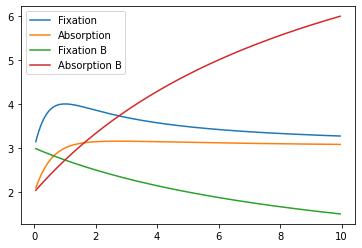

In [83]:
f = TM(3)
r = np.linspace(0,10,200)[1:-1]
plt.plot(r, TM(3)(1, r), label="Fixation")
plt.plot(r, tauM(3)(1, r), label="Absorption")
plt.plot(r, TB(3)(1, r, .1), label="Fixation B")
plt.plot(r, tauB(3)(1, r, .1), label="Absorption B")
plt.legend()



In [91]:
r,p = sp.var("r,p")

In [92]:
TM(3)(sp.Integer(1), r).simplify()

3*(r**2 + 2*r + 1)/(r**2 + r + 1)

In [93]:
tauM(3)(sp.Integer(1), r).simplify()

(3*r**2 + 4*r + 2)/(r**2 + r + 1)

In [94]:
TB(3)(sp.Integer(1), r, p).simplify()

3/(p*r + 1)

In [95]:
tauB(3)(sp.Integer(1), r, p).simplify()

(r + 2)/(p*r + 1)

In [96]:
PhiB(3)(1,r,p)

p*r/(r + 2)